In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_roc_curve, roc_curve

## Reading the dataset

In [2]:
df = pd.read_csv("./adult_dataset.csv")
print("Shape of the dataframe: {}".format(df.shape))
print(df.info())

Shape of the dataframe: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


## Data Cleaning

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<b>'age'</b>

In [4]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

 <b>'education'</b> and <b>'education.num'</b>

In [5]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [6]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [7]:
df.groupby(["education.num", "education"]).size()

education.num  education   
1              Preschool          51
2              1st-4th           168
3              5th-6th           333
4              7th-8th           646
5              9th               514
6              10th              933
7              11th             1175
8              12th              433
9              HS-grad         10501
10             Some-college     7291
11             Assoc-voc        1382
12             Assoc-acdm       1067
13             Bachelors        5355
14             Masters          1723
15             Prof-school       576
16             Doctorate         413
dtype: int64

For each of the education level in the field 'education', we have a corresponding number assigned in the field 'education.num'. Hence we can remove one of the redundant fields. <br>
***Dropping 'education'*** since keeping label encoded field will be beneficial

In [8]:
df.drop(columns=['education'],inplace=True)
df.shape

(32561, 14)

<b>'fnlwgt'</b>

In [9]:
df["fnlwgt"].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

Since the ***'fnlwgt'*** field is dependent on the State and the State info is not available, keeping this field will not do any benefit. Hence ***dropping 'fnlwgt'***

In [10]:
df.drop(columns=["fnlwgt"], inplace=True)
df.shape

(32561, 13)

<b>'workclass'</b>

In [11]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
# Checking the income for those with 'workclass' as 'Without-pay' and 'Never-worked'
df.loc[df['workclass'].isin(["Without-pay","Never-worked"]) ,["income"]].value_counts()

income
<=50K     21
dtype: int64

As expected the income for 'workclass' as 'Without-pay' and 'Never-worked' is '<=50K'

<b>'marital.statue'</b>

In [13]:
df["marital.status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

<b>'occupation'</b>

In [14]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

<b>'relationship'</b>

In [15]:
df["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

<b>'race'</b>

In [16]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<b>'sex'</b>

In [17]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

<b>'capital.gain'</b>

In [18]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

<b>'capital.loss'</b>

In [19]:
df['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64

<b>'hours.per.week'</b>

In [20]:
df["hours.per.week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [21]:
df.loc[df['workclass'].isin(["Never-worked"]) ,["hours.per.week"]].value_counts()

hours.per.week
40                3
4                 1
10                1
30                1
35                1
dtype: int64

This is anomalous behaviour. It was expected that the 'Never-worked' population will be having 'hours.per.week' as 0. But its having 'hours.per.week' as high as 40

<b>'native.country'</b>

In [22]:
df["native.country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

<b>'income'</b>

In [23]:
df['income'].value_counts(normalize=True, dropna=False)*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

We have slight class imbalance with the '<=50K' being the dominant class. Class imbalance will be handled at a later stage

<b>Handling the '?' symbol in the dataset</b>

In [24]:
# Checking the fields that contain the '?' character
df.columns[df.apply(lambda x: x=="?", axis=0).sum()>0]

Index(['workclass', 'occupation', 'native.country'], dtype='object')

I was expecting '?' to be indicating 'unemployed'. But since the 'workclass' already has 'Never-worked' as a value, '?' might not be the category for un-employed. Also the records with income class '>50K' also has '?' in it. Thus its not probable that those are of unemployed categories

In [25]:
# Percentage of records with '?' in it
df.loc[(df['workclass']=='?') | (df['occupation']=='?') | (df['native.country']=='?')].shape[0]*100/df.shape[0]

7.36770983692147

In [26]:
# Distribution of invalid records among the two income classes
df.loc[(df['workclass']=='?') | (df['occupation']=='?') | (df['native.country']=='?'), "income"].value_counts(normalize=True)*100

<=50K    86.119216
>50K     13.880784
Name: income, dtype: float64

Of all the records having '?' character, 86% are from the income class '<=50K' and remaining are from the income class '>50K'

In [27]:
# Percentage of records (w.r.t to each income class that has invalid records)
df.loc[(df['workclass']=='?') | (df['occupation']=='?') | (df['native.country']=='?'), "income"].value_counts()/df.loc[:,"income"].value_counts()

<=50K    0.083576
>50K     0.042469
Name: income, dtype: float64

8% of records of income class '<=50K' is having '?' character in it, while 4% of the records of income class '>50K' has '?' characters in it

In [28]:
df.loc[df['occupation'] == "?",["sex"]].groupby("sex").size()*100/df['sex'].value_counts()

Female    7.808003
Male      4.598440
dtype: float64

Since only 8% records have '?' as value and those records have almost proportional representation from each of the classes , it is better to ***drop those records***

In [29]:
# Dropping the records with '?' in it
df.drop(index=df.loc[(df['workclass']=='?') | (df['occupation']=='?') | (df['native.country']=='?'), "income"].index, inplace=True)
df.shape

(30162, 13)

In [30]:
# Checking the fields that contain the '?' character
df.columns[df.apply(lambda x: x=="?", axis=0).sum()>0]

Index([], dtype='object')

## Data Preperation

In [31]:
# Label encoding the categorical variables (including the target variable)
df.select_dtypes(include=["object"]).columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country', 'income'],
      dtype='object')

In [32]:
df.select_dtypes(exclude=["object"]).columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [33]:
# Label encoding the categorical fields
cat_cols = df.select_dtypes(include=["object"]).columns
df.loc[:,cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   education.num   30162 non-null  int64
 3   marital.status  30162 non-null  int32
 4   occupation      30162 non-null  int32
 5   relationship    30162 non-null  int32
 6   race            30162 non-null  int32
 7   sex             30162 non-null  int32
 8   capital.gain    30162 non-null  int64
 9   capital.loss    30162 non-null  int64
 10  hours.per.week  30162 non-null  int64
 11  native.country  30162 non-null  int32
 12  income          30162 non-null  int32
dtypes: int32(8), int64(5)
memory usage: 2.3 MB


In [34]:
# Extracting dependent and independent variable from the dataframe
X = df.loc[:, [col for col in df.columns if col != "income"]]
y = df["income"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of the train set: {} and {}".format(X_train.shape, y_train.shape))
print("Shape of the test set: {} and {}".format(X_test.shape, y_test.shape))

Shape of the train set: (21113, 12) and (21113,)
Shape of the test set: (9049, 12) and (9049,)


## Model fitting

<b>Decision Tree</b>

In [36]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
print("Depth of the decision tree: {}".format(clf_dt.tree_.max_depth))

Depth of the decision tree: 41


In [37]:
y_train_pred = clf_dt.predict(X_train)

In [38]:
print("******Train Set******")
print("Accuaracy")
print(accuracy_score(y_train, y_train_pred))
print("-"*50)
print("Classification Report")
print(classification_report(y_train, y_train_pred))
print("-"*50)
print("Confusion Matrix")
print(confusion_matrix(y_train, y_train_pred))

******Train Set******
Accuaracy
0.9791123952067446
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15900
           1       0.99      0.93      0.96      5213

    accuracy                           0.98     21113
   macro avg       0.98      0.96      0.97     21113
weighted avg       0.98      0.98      0.98     21113

--------------------------------------------------
Confusion Matrix
[[15843    57]
 [  384  4829]]


In [39]:
y_test_pred = clf_dt.predict(X_test)

In [40]:
print("******Test Set******")
print("Accuaracy")
print(accuracy_score(y_test, y_test_pred))
print("-"*50)
print("Classification Report")
print(classification_report(y_test, y_test_pred))
print("-"*50)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))

******Test Set******
Accuaracy
0.8088186539949166
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6754
           1       0.63      0.61      0.62      2295

    accuracy                           0.81      9049
   macro avg       0.75      0.74      0.75      9049
weighted avg       0.81      0.81      0.81      9049

--------------------------------------------------
Confusion Matrix
[[5917  837]
 [ 893 1402]]


## Hyperparameter tuning

<b>max_depth</b>

In [41]:
# param_grid = ParameterGrid({"max_depth":[5]})
param_grid = {"max_depth":list(range(2, 41))}
clf_gs = GridSearchCV(estimator=clf_dt, param_grid=param_grid, scoring="roc_auc", cv=5, n_jobs=4, verbose=4, return_train_score=True)
clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [42]:
grid_search_results = pd.DataFrame(clf_gs.cv_results_)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016196,0.002397,0.004403,0.000795,2,{'max_depth': 2},0.802950,0.801068,0.800965,0.801786,...,0.801527,0.000782,19,0.801163,0.801631,0.801677,0.801459,0.801689,0.801524,0.000198
1,0.017795,0.002923,0.003405,0.000804,3,{'max_depth': 3},0.839016,0.851999,0.843620,0.851450,...,0.846767,0.004904,12,0.848817,0.845536,0.847626,0.845631,0.846630,0.846848,0.001244
2,0.022600,0.002800,0.003604,0.000485,4,{'max_depth': 4},0.855974,0.869132,0.865281,0.870892,...,0.864886,0.005229,9,0.867444,0.864141,0.872977,0.867428,0.865773,0.867553,0.002975
3,0.029816,0.006293,0.005012,0.001066,5,{'max_depth': 5},0.866893,0.880891,0.874851,0.888863,...,0.876842,0.007495,6,0.878768,0.878477,0.883694,0.881982,0.876175,0.879819,0.002679
4,0.041400,0.006406,0.005200,0.002400,6,{'max_depth': 6},0.879868,0.893876,0.890398,0.892627,...,0.889539,0.004991,4,0.897093,0.893605,0.898838,0.897336,0.894753,0.896325,0.001887


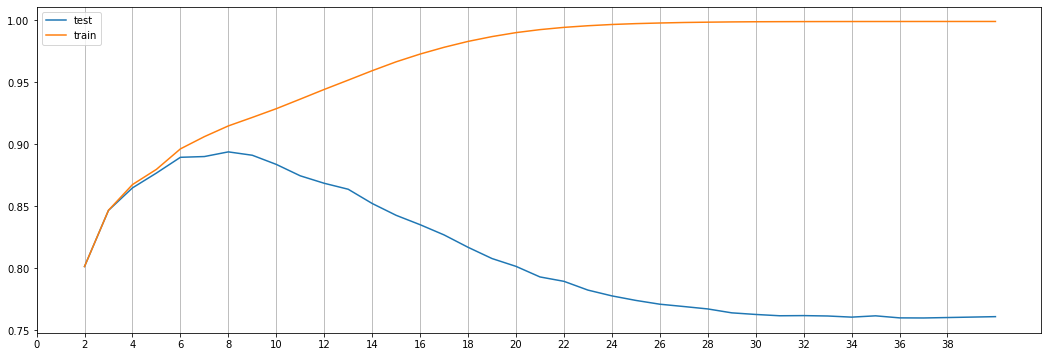

In [43]:
plt.figure(figsize=(18,6))
plt.plot(grid_search_results["param_max_depth"], grid_search_results["mean_test_score"], label="test")
plt.plot(grid_search_results["param_max_depth"], grid_search_results["mean_train_score"], label="train")
plt.grid(visible=True, axis="x")
plt.xticks(ticks=range(0,40,2))
plt.legend()
plt.show()

<b>min_samples_split</b>

In [44]:
param_grid = {"min_samples_split":list(range(2, 200, 5))}
clf_gs = GridSearchCV(estimator=clf_dt, param_grid=param_grid, scoring="roc_auc", cv=5, n_jobs=4, verbose=4, return_train_score=True)
clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'min_samples_split': [2, 7, 12, 17, 22, 27, 32, 37, 42,
                                               47, 52, 57, 62, 67, 72, 77, 82,
                                               87, 92, 97, 102, 107, 112, 117,
                                               122, 127, 132, 137, 142, 147, ...]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [45]:
grid_search_results = pd.DataFrame(clf_gs.cv_results_)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059189,0.005811,0.004201,0.000401,2,{'min_samples_split': 2},0.755345,0.757753,0.758999,0.773975,...,0.760659,0.006761,40,0.999017,0.999027,0.999025,0.998948,0.999054,0.999014,0.000036
1,0.061302,0.003313,0.004602,0.000491,7,{'min_samples_split': 7},0.797245,0.814907,0.806074,0.815166,...,0.806578,0.007492,39,0.987400,0.987092,0.987004,0.987016,0.987031,0.987108,0.000149
2,0.061107,0.005503,0.003804,0.000750,12,{'min_samples_split': 12},0.822341,0.831841,0.828475,0.839116,...,0.829884,0.005531,38,0.977246,0.977533,0.976780,0.977108,0.977172,0.977168,0.000242
3,0.057800,0.007026,0.004605,0.000802,17,{'min_samples_split': 17},0.836837,0.844567,0.842665,0.853422,...,0.844294,0.005325,37,0.970463,0.969829,0.969700,0.969797,0.970395,0.970037,0.000324
4,0.057800,0.008705,0.004000,0.000894,22,{'min_samples_split': 22},0.849393,0.852842,0.851346,0.860887,...,0.853862,0.003941,36,0.964444,0.964327,0.963885,0.965026,0.965033,0.964543,0.000439


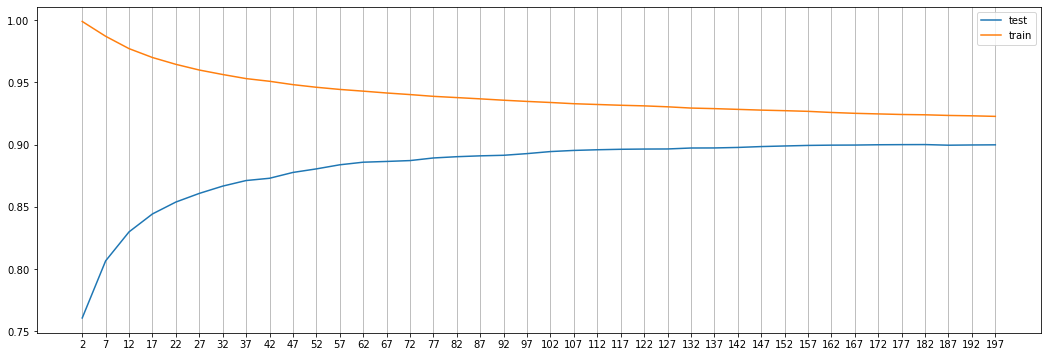

In [46]:
plt.figure(figsize=(18,6))
plt.plot(grid_search_results["param_min_samples_split"], grid_search_results["mean_test_score"], label="test")
plt.plot(grid_search_results["param_min_samples_split"], grid_search_results["mean_train_score"], label="train")
plt.grid(visible=True, axis="x")
plt.xticks(ticks=range(2,200,5))
plt.legend()
plt.show()

<b>min_samples_leaf</b>

In [47]:
# param_grid = ParameterGrid({"max_depth":[5]})
param_grid = {"min_samples_leaf":list(range(1,300,20))}
clf_gs = GridSearchCV(estimator=clf_dt, param_grid=param_grid, scoring="roc_auc", cv=5, n_jobs=4, verbose=4, return_train_score=True)
clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'min_samples_leaf': [1, 21, 41, 61, 81, 101, 121, 141,
                                              161, 181, 201, 221, 241, 261,
                                              281]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [48]:
grid_search_results = pd.DataFrame(clf_gs.cv_results_)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056983,0.004588,0.004203,0.000398,1,{'min_samples_leaf': 1},0.755345,0.757753,0.758999,0.773975,...,0.760659,0.006761,15,0.999017,0.999027,0.999025,0.998948,0.999054,0.999014,0.000036
1,0.047217,0.005720,0.004185,0.000731,21,{'min_samples_leaf': 21},0.888007,0.897132,0.890954,0.893371,...,0.892976,0.003230,11,0.933644,0.931526,0.932265,0.931293,0.931967,0.932139,0.000825
2,0.043200,0.005565,0.003800,0.000748,41,{'min_samples_leaf': 41},0.895064,0.901155,0.900198,0.899517,...,0.899891,0.002769,3,0.924841,0.921233,0.921031,0.922464,0.923977,0.922709,0.001497
3,0.047202,0.001936,0.004201,0.000749,61,{'min_samples_leaf': 61},0.897963,0.903132,0.900213,0.899253,...,0.900767,0.002114,1,0.917178,0.914614,0.915676,0.917273,0.917837,0.916515,0.001190
4,0.041029,0.004883,0.004578,0.000840,81,{'min_samples_leaf': 81},0.895117,0.904100,0.898988,0.899380,...,0.899619,0.002884,4,0.914364,0.911281,0.912702,0.913230,0.912736,0.912862,0.000993


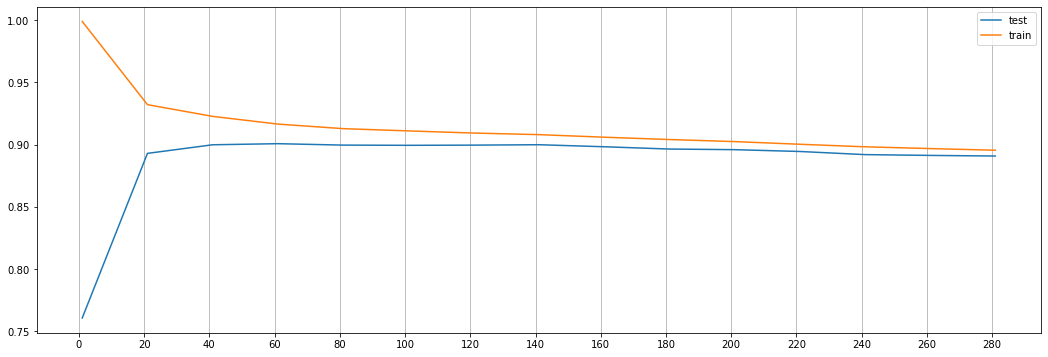

In [49]:
plt.figure(figsize=(18,6))
plt.plot(grid_search_results["param_min_samples_leaf"], grid_search_results["mean_test_score"], label="test")
plt.plot(grid_search_results["param_min_samples_leaf"], grid_search_results["mean_train_score"], label="train")
plt.grid(visible=True, axis="x")
plt.xticks(ticks=range(0,300,20))
plt.legend()
plt.show()

<b>max_features</b>

In [50]:
# param_grid = ParameterGrid({"max_depth":[5]})
param_grid = {"max_features":list(range(1, 12))}
clf_gs = GridSearchCV(estimator=clf_dt, param_grid=param_grid, scoring="roc_auc", cv=5, n_jobs=4, verbose=4, return_train_score=True)
clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [51]:
grid_search_results = pd.DataFrame(clf_gs.cv_results_)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022015,0.003062,0.004602,0.000489,1,{'max_features': 1},0.737096,0.740012,0.738199,0.749977,...,0.744480,0.007796,11,0.999017,0.999027,0.999025,0.998948,0.999054,0.999014,0.000036
1,0.027199,0.004534,0.005215,0.000394,2,{'max_features': 2},0.754073,0.757098,0.749951,0.764677,...,0.756773,0.004859,8,0.999017,0.999027,0.999025,0.998948,0.999054,0.999014,0.000036
2,0.028208,0.002317,0.004991,0.000894,3,{'max_features': 3},0.762645,0.766291,0.751166,0.761905,...,0.760702,0.005060,1,0.999017,0.999027,0.999025,0.998948,0.999054,0.999014,0.000036
3,0.029601,0.002060,0.004201,0.000400,4,{'max_features': 4},0.767307,0.753867,0.753439,0.756461,...,0.755867,0.006308,10,0.999017,0.999027,0.999025,0.998948,0.999054,0.999014,0.000036
4,0.037399,0.002578,0.004402,0.001021,5,{'max_features': 5},0.759764,0.753206,0.745525,0.766186,...,0.756425,0.006880,9,0.999017,0.999027,0.999025,0.998948,0.999054,0.999014,0.000036


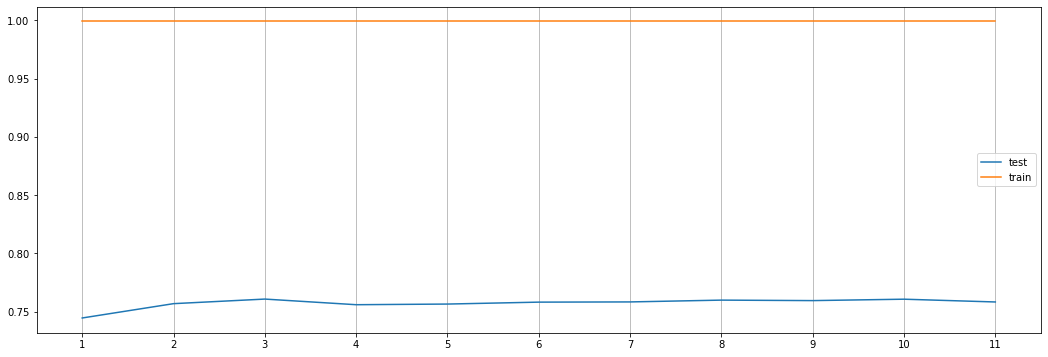

In [52]:
plt.figure(figsize=(18,6))
plt.plot(grid_search_results["param_max_features"], grid_search_results["mean_test_score"], label="test")
plt.plot(grid_search_results["param_max_features"], grid_search_results["mean_train_score"], label="train")
plt.grid(visible=True, axis="x")
plt.xticks(ticks=range(1,12,1))
plt.legend()
plt.show()

## Creating final model

In [53]:
# Creating the final model with the chosen hyperparameters
final_clf_dt = DecisionTreeClassifier(max_depth=6, min_samples_split= 150, min_samples_leaf=120, random_state=42)
final_clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=120, min_samples_split=150,
                       random_state=42)

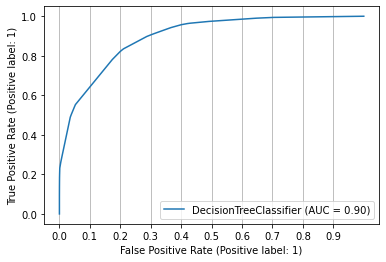

In [60]:
# Plotting the ROC curve
plot_roc_curve(final_clf_dt, X_train, y_train)
plt.grid(visible=True, axis="x")
plt.xticks(ticks=np.arange(0, 1, 0.1))
plt.show()

In [55]:
# Determining the optimal threshold
y_train_score = final_clf_dt.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_score[:,1])

optimal_threshold_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_threshold_idx]
print("Optimal threshold: {}".format(optimal_threshold))

Optimal threshold: 0.2846153846153846


In [56]:
# Predicitng the target variable based on the optimal threshold - for train set
y_train_pred = final_clf_dt.predict_proba(X_train)[:,1]>0.284
print("******Train Set******")
print("Accuaracy")
print(accuracy_score(y_train, y_train_pred))
print("-"*50)
print("Classification Report")
print(classification_report(y_train, y_train_pred))
print("-"*50)
print("Confusion Matrix")
print(confusion_matrix(y_train, y_train_pred))

******Train Set******
Accuaracy
0.800691517074788
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     15900
           1       0.57      0.84      0.67      5213

    accuracy                           0.80     21113
   macro avg       0.75      0.81      0.77     21113
weighted avg       0.84      0.80      0.81     21113

--------------------------------------------------
Confusion Matrix
[[12551  3349]
 [  859  4354]]


In [59]:
# Predicitng the target variable based on the optimal threshold - for test set
y_test_pred = final_clf_dt.predict_proba(X_test)[:,1]>0.284
print("******Test Set******")
print("Accuaracy")
print(accuracy_score(y_test, y_test_pred))
print("-"*50)
print("Classification Report")
print(classification_report(y_test, y_test_pred))
print("-"*50)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))

******Test Set******
Accuaracy
0.8020775776328876
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6754
           1       0.58      0.84      0.68      2295

    accuracy                           0.80      9049
   macro avg       0.76      0.81      0.77      9049
weighted avg       0.84      0.80      0.81      9049

--------------------------------------------------
Confusion Matrix
[[5328 1426]
 [ 365 1930]]
